# Survival of Patients Prediction with Heart Failure using Ensemble Method
---  ------                       --------------   -----  
In this notebook, we would like to predict mortality caused by Heart Failure using Decision Tree, Random Forest, XG Boost, and Naive Bayes

# Problem Statement
---  ------                       --------------   -----  
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. CVDs are disorders of the heart and blood vessels including, coronary heart disease (heart attacks), cerebrovascular diseases (strokes), heart failure, and other types of pathology. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure. In particular, heart failure occurs when the heart is unable to pump enough blood to the body, and it is usually caused by diabetes, high blood pressure, or other heart conditions or diseases

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Machine learning applied to medical records, in particular, can be an effective tool both to predict the survival of each patient having heart failure symptoms, and to detect the most important clinical features (or risk factors) that may lead to heart failure. In this notebook we will using Decision Tree, Random Forest, XG Boost, and Naive Bayes method of Machine Learning implementation for Patient's Survival Prediction.

# Data Source
Kaggle : Heart Failure Prediction ( https://www.kaggle.com/andrewmvd/heart-failure-clinical-data )

# Data Attributes
Total : 299 observation × 13 variables

1. age: Age of the patient
2. anaemia: If the patient had the haemoglobin below the normal range
3. creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
4. diabetes: If the patient was diabetic
5. ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
6. high_blood_pressure: If the patient had hypertension
7. platelets: Platelet count of blood in kiloplatelets/mL
8. serum_creatinine: The level of serum creatinine in the blood in mg/dL
9. serum_sodium: The level of serum sodium in the blood in mEq/L
10. sex: The sex of the patient
11. smoking: If the patient smokes actively or ever did in past
12. time: It is the time of the patient's follow-up visit for the disease in months
13. DEATH_EVENT: If the patient deceased during the follow-up period

# Objective:
---  ------                       --------------   -----  
    1. Get a good dataset with clear variables
    2. Get complete and easy-to-understand informationTo understand the dataset
    3. Get a clear partition of data for modeling
    4. Get a good Decision Tree, Random Forest, XG Boost, and Naive Bayes model
    5. To predict survival of patients with heart failure by training classification models

# Import Library

In [1]:
! pip install imblearn

In [2]:
import sys
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import opendatasets as od
import os

# For Prepocessing Data 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE


# For Evaluation Model 
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Classification Model 

# 1. Decision Tree Clasification 
from sklearn.tree import DecisionTreeClassifier

# 2. Random Forest Classifitaion 
from sklearn.ensemble import RandomForestClassifier

# 3. XGBoost Classification
from xgboost import XGBClassifier

# 4. Naive Bayes Classification 
from sklearn.naive_bayes import GaussianNB

# 5. KNN 
from sklearn.neighbors import KNeighborsRegressor


# Loading Data 

In [4]:
od.download("https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data")

Skipping, found downloaded files in ".\heart-failure-clinical-data" (use force=True to force download)


In [5]:
data = "heart-failure-clinical-data"

In [6]:
os.listdir(data)

['heart_failure_clinical_records_dataset.csv']

In [7]:
df = pd.read_csv('heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
pd.set_option('display.max_columns', None)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

It can be seen that all data variables do not have a null value.

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
for col in df.columns:
    print(format(col),df[col].unique())

age [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anaemia [0 1]
creatinine_phosphokinase [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 2442 

Changing the form of some variables to 'object category' ('age', 'anemia', 'diabetes','high_blood_pressure', 'sex','smoking','DEATH_EVENT') so they can be used for EDA

In [12]:
df_EDA = df.copy()
df_EDA

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [13]:
df_EDA["sex"] = np.where(df_EDA["sex"] < 1, "Female", "Male")

In [14]:
for col in df_EDA.columns:
    print(format(col),df_EDA[col].unique())

age [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anaemia [0 1]
creatinine_phosphokinase [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 2442 

In [15]:
categoricals=['anaemia','diabetes','high_blood_pressure','smoking', 'DEATH_EVENT']
change = {0:"No", 1:"Yes"}
for col in categoricals :
    for i in range(299):
        df_EDA.loc[i,col]=change[df_EDA.loc[i,col]]
for col in df_EDA.columns:
    print(format(col),df_EDA[col].unique())

age [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anaemia ['No' 'Yes']
creatinine_phosphokinase [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 233

In [16]:
df_EDA.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,7,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,8,Yes


# Exploratory Data Analysis (EDA)

In [17]:
color = ('#365c8d', '#1fa187')

## Sex (Gender) Distribution

*************************
.: Sex (Gender) Total :.
*************************


Male      194
Female    105
Name: sex, dtype: int64

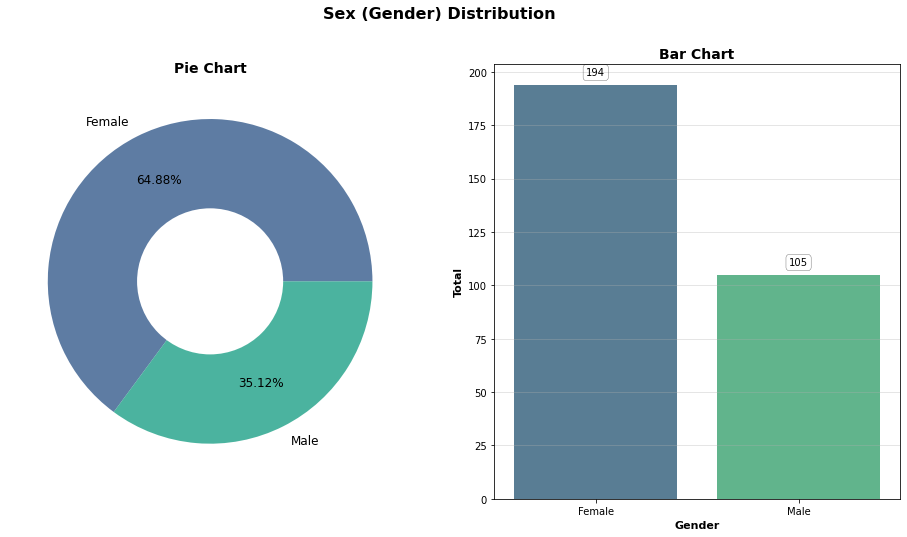

In [18]:
# --- Setting Colors, Labels, Order ---

labels=['Female', 'Male']
order=df['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
plt.pie(df['sex'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12}, colors = color)
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Bar Chart ---
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
ax = sns.countplot(x='sex', data=df, order=order,
                   alpha=0.85, palette = 'viridis')
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
          )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           )
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df_EDA.sex.value_counts(dropna=False)

**Insight :**

Based on the Pie Chart and Bar Chart above it can be seen the sex (gender) distribution of this dataset. 

In the dataset, there are **105 Male with a percentage of 35.12%** and **194 Female with a percentage of 64.88%**. 

So it can be concluded that the total of **Female is more than that of Male**.

## Anaemia, Diabetes, High Blood Pressure, Sex, Smoking, and DeathEvent Distribution

In [19]:
cat_cols = df_EDA.loc(axis=1)['anaemia','diabetes','high_blood_pressure',
                          'sex','smoking','DEATH_EVENT']
num_cols = df_EDA.loc(axis=1)['age','creatinine_phosphokinase','ejection_fraction',
                          'platelets','serum_creatinine','serum_sodium','time']

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

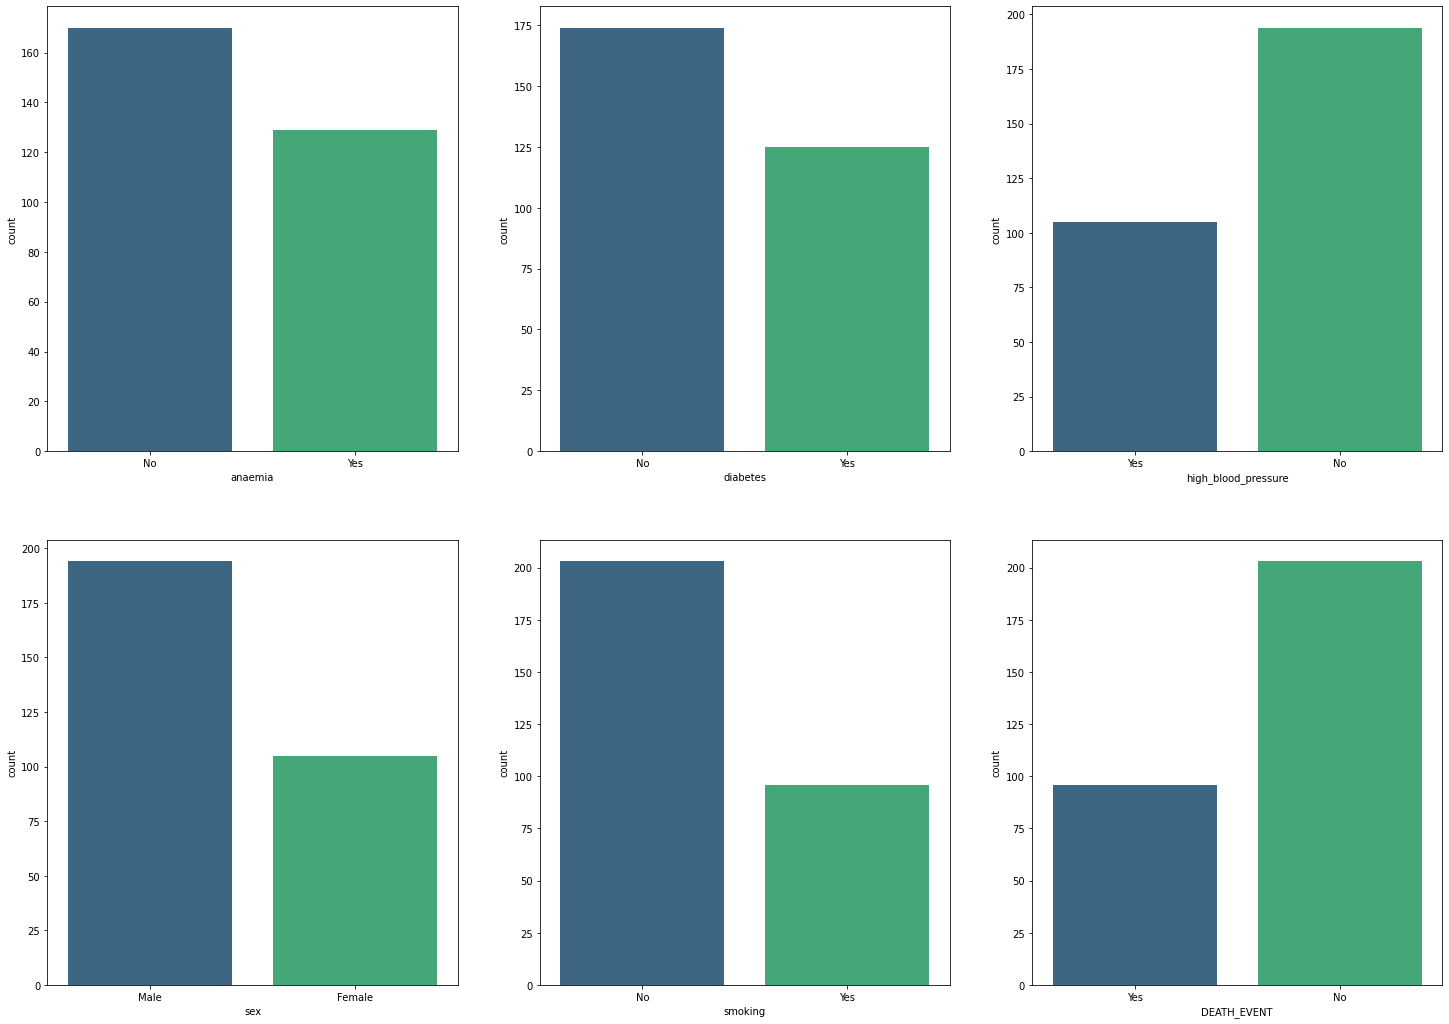

In [20]:
cat_col = [ 'anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']
fig = plt.figure(figsize = (25,18))
j=1
for i in cat_col:
    plt.subplot(2,3,j)
    ax = sns.countplot(df_EDA[i], palette = 'viridis')
    j=j+1
    

In [21]:
print(df_EDA.anaemia.value_counts(dropna=False))
print(df_EDA.diabetes.value_counts(dropna=False))
print(df_EDA.high_blood_pressure.value_counts(dropna=False))
print(df_EDA.sex.value_counts(dropna=False))
print(df_EDA.smoking.value_counts(dropna=False))
print(df_EDA.DEATH_EVENT.value_counts(dropna=False))

No     170
Yes    129
Name: anaemia, dtype: int64
No     174
Yes    125
Name: diabetes, dtype: int64
No     194
Yes    105
Name: high_blood_pressure, dtype: int64
Male      194
Female    105
Name: sex, dtype: int64
No     203
Yes     96
Name: smoking, dtype: int64
No     203
Yes     96
Name: DEATH_EVENT, dtype: int64


**Insight  :** 

Based on the all graph above and the dataset it can be seen that,

- **Sex** : Male = 105 , Female = 194
- **Diabetes** : No =174, Yes = 125
- **Anaemia** : No = 170 , Yes = 129
- **High_blood_pressure** : No =194, Yes = 105
- **Smoking** : No = 203, Yes = 96
- **DEATH_EVENT** : No = 203, Yes =96

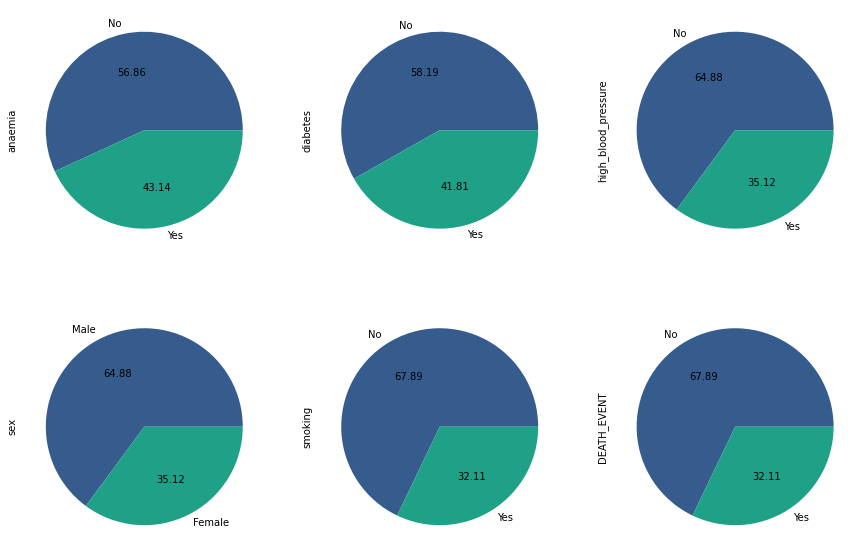

In [22]:
cat_col = [ 'anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']
fig = plt.figure(figsize = (15,10))
j=1
for i in cat_col:
    plt.subplot(2,3,j)
    df_EDA[i].value_counts().plot(kind ='pie',autopct = '%.2f', colors = color)
    j=j+1

**Insight :**

Based on the graph above it can be seen the persentation from all,
1. **Sex** : Male = 64.88% , Female = 35.12%
2. **Diabetes** : No = 58.19%, Yes = 41.81%
3. **Anaemia** : No = 56.86% , Yes = 43.14%
4. **High_blood_pressure** : No = 64.88%, Yes = 35.12%
5. **Smoking** : No = 67.89%, Yes = 32.11%
6. **DEATH_EVENT** : No = 67.89%, Yes = 32.11%

## Correlation with DeathEvent

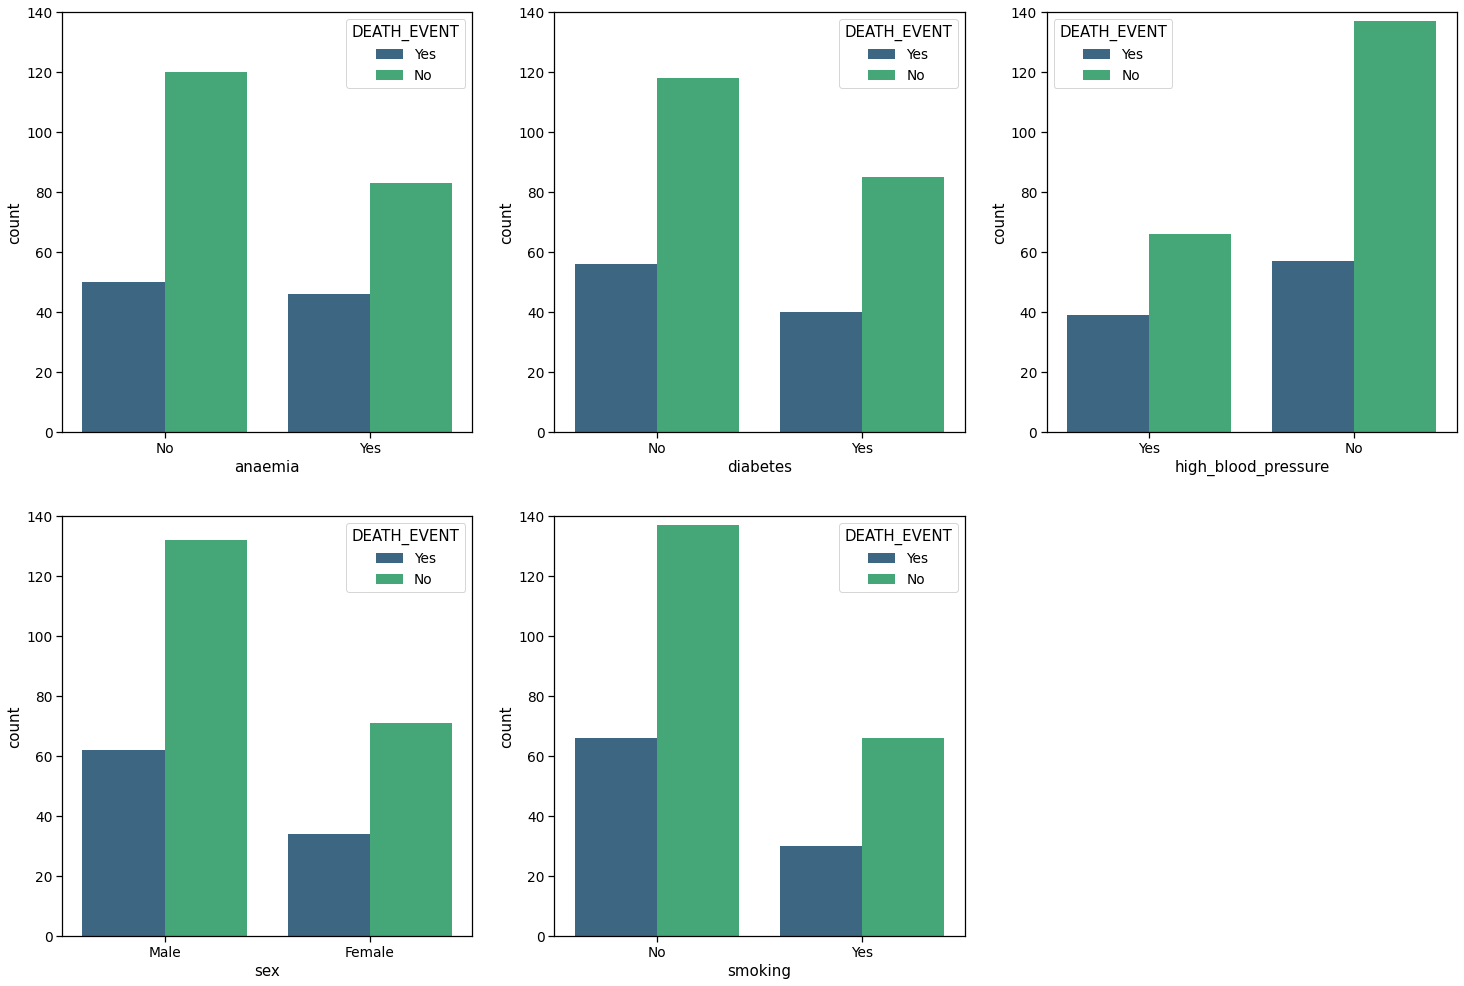

In [23]:
sns.set_context("notebook", font_scale=1.25)

fig, ax = plt.subplots(2,3, figsize=(25, 17))
[sns.countplot(data=df_EDA, x=cat, hue="DEATH_EVENT", ax=ax.flatten()[i], palette = 'viridis') 
 for i,cat in enumerate(cat_cols.drop('DEATH_EVENT',axis=1))]

ax.flatten()[-1].set_visible(False) # Remove the 6th empty plot
[y_ax.set_ylim(0,140) for y_ax in ax.flatten()]


plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

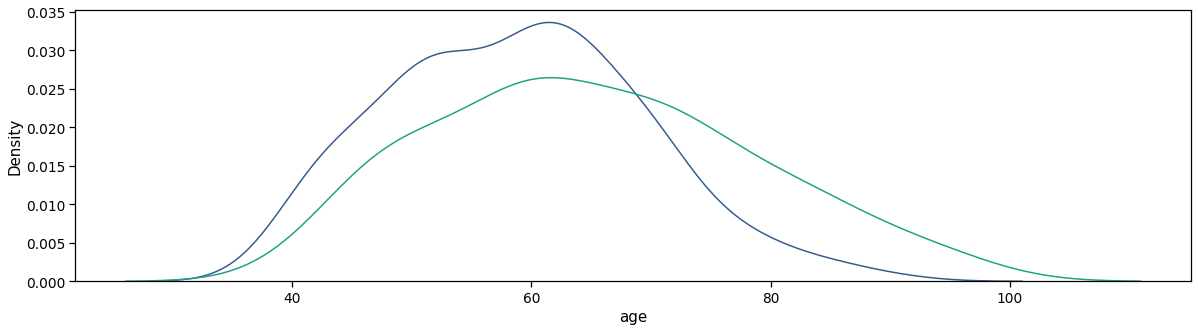

In [24]:
fig = plt.figure(figsize =(20,5))
sns.distplot(df_EDA[df_EDA['DEATH_EVENT'] == 'No']['age'],hist = False, color = '#365c8d', )
sns.distplot(df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']['age'],hist =False, color= '#1fa187')

**Insight :** 

From the line chart above, we can see that **If a person is above 60 years then the chances of getting a heart failure is high.**

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

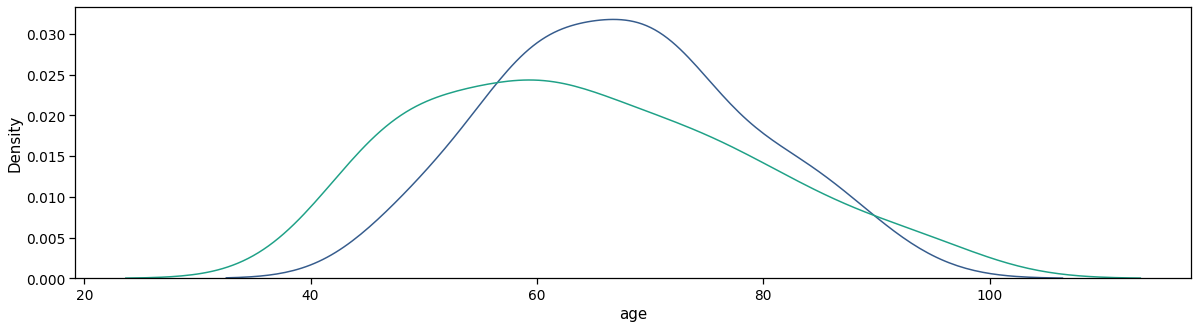

In [25]:
data1 =df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']
data2 =df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']

fig = plt.figure(figsize =(20,5))
sns.distplot(data1[data1['smoking'] == 'Yes']['age'],hist = False, color = '#365c8d')
sns.distplot(data2[data2['smoking'] == 'No']['age'],hist =False, color= '#1fa187')

**Insight :**

Based on line chart above, we can conclude **A Smoker has a higher chance of heart failure having same age as that of a Non Smoker.**

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

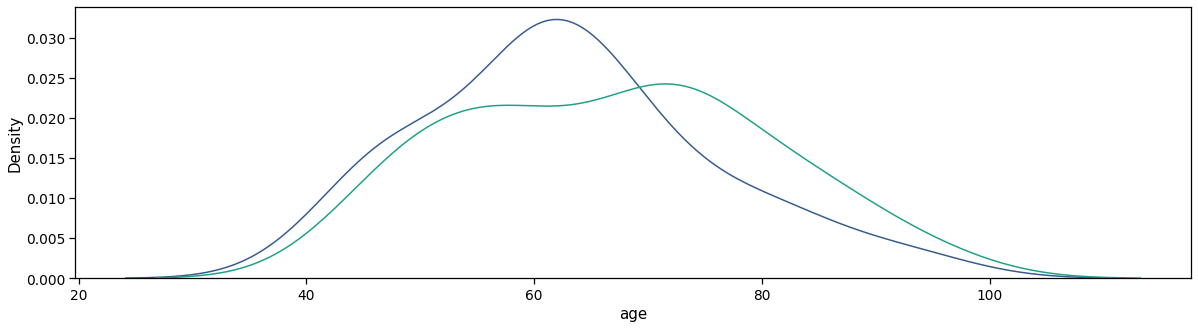

In [26]:
data1 =df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']
data2 =df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']

fig = plt.figure(figsize =(20,5))
sns.distplot(data1[data1['diabetes'] == 'Yes']['age'],hist = False, color = '#365c8d')
sns.distplot(data2[data2['diabetes'] == 'No']['age'],hist =False, color= '#1fa187')

**Insight :**

Based on line chart above, we can conclude **Similar result for diabetes, at a lower age chances of getting a heart failure is high for a diabetic person at the age of 60.**

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

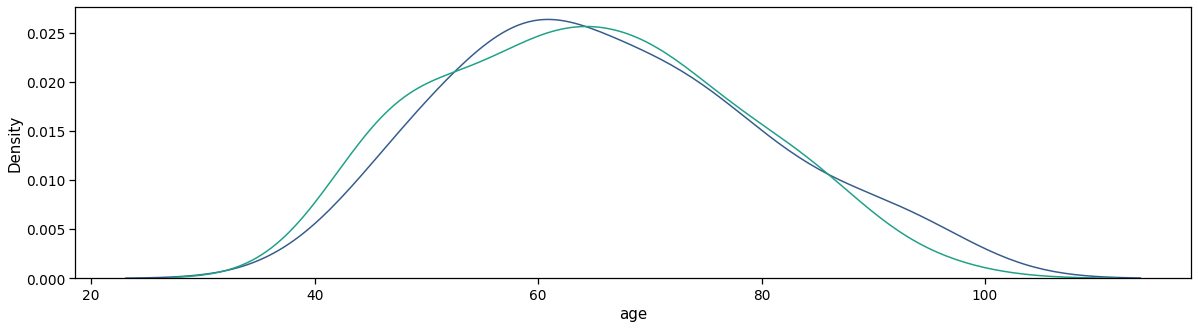

In [27]:
data1 =df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']
data2 =df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']


fig = plt.figure(figsize =(20,5))
sns.distplot(data2[data2['anaemia'] == 'Yes']['age'],hist = False, color = '#365c8d')
sns.distplot(data1[data1['anaemia'] == 'No']['age'],hist =False, color= '#1fa187')

**Insight :**

Based on line chart above, we can conclude **A person suffering from anemia has fatality when a person is above 60 years.** For people with anemia or those who are not the same have a chances of getting a heart failure.

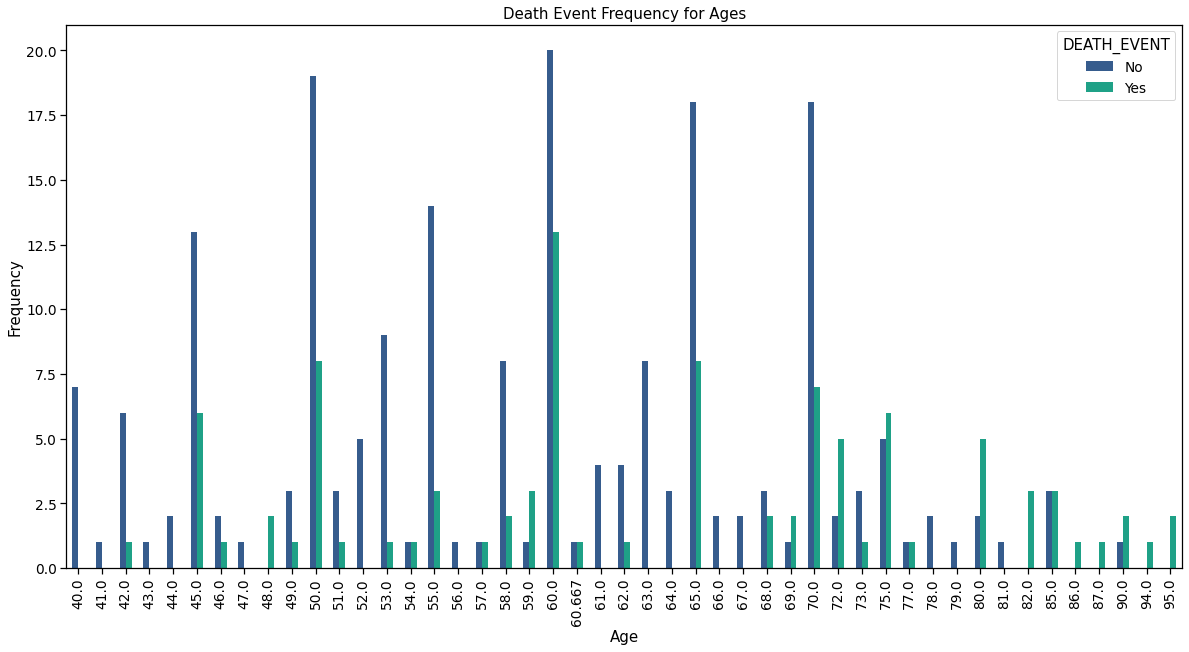

In [28]:
pd.crosstab(df_EDA.age,df_EDA.DEATH_EVENT).plot(kind="bar",figsize=(20,10), color = ['#365c8d', '#1fa187'])
plt.title('Death Event Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Insight :**

Based on graph above, it can be conclude By the time of age 60 the chart shows the highest of death events.

# Data Prepocessing 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


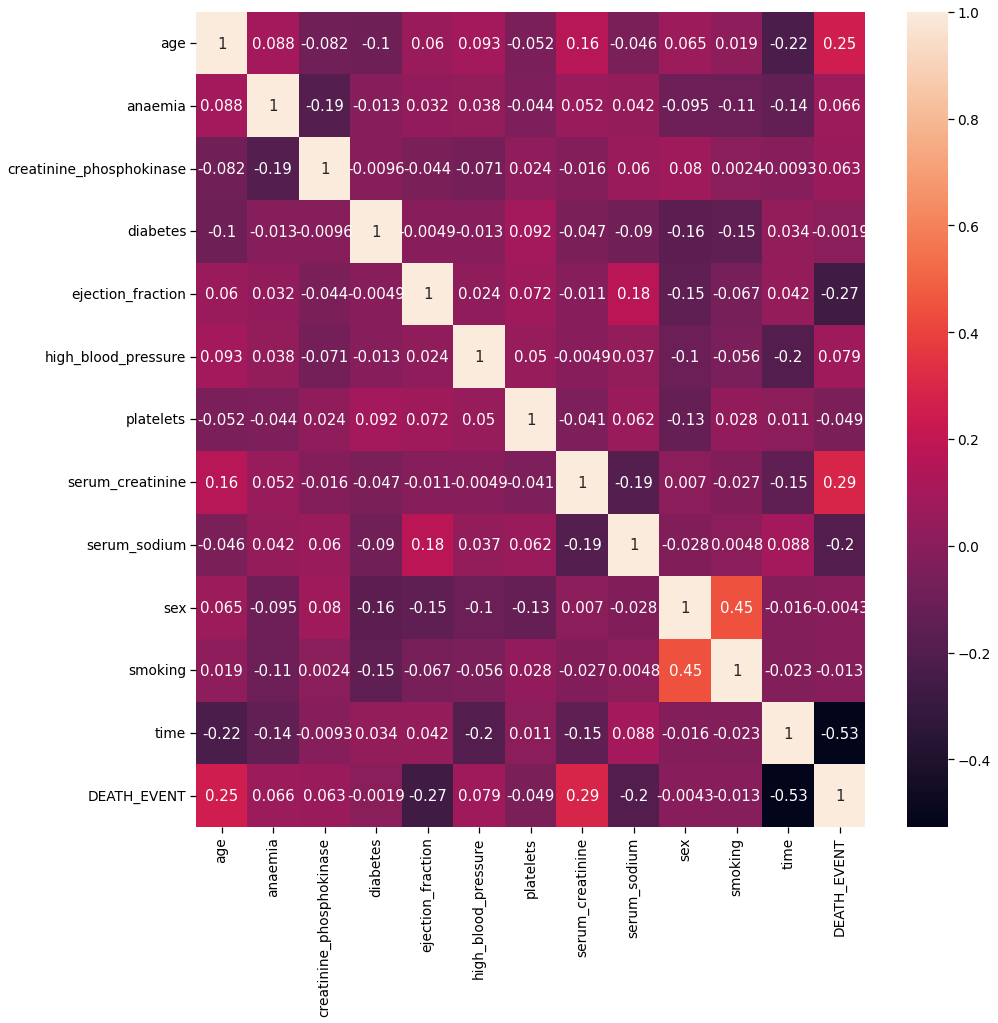

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

It can be seen that the variables 'Diabetes','sex','smoking' have less effect on the target.

In [31]:
x = df.drop(["DEATH_EVENT", "diabetes", "sex", "smoking"],  axis=1 )
y = df["DEATH_EVENT"]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

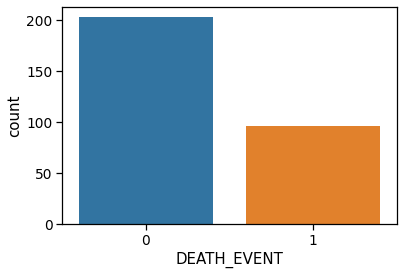

In [32]:
sns.countplot(df['DEATH_EVENT'])

## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
column = x.columns
scaled_x = scale.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x,columns=column)
scaled_x.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time
0,1.192945,-0.871105,0.000166,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,-0.871105,7.514640,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.871105,-0.449939,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,1.147968,-0.486071,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,1.147968,-0.435486,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.577879


## Resampling : SMOTE 

In [34]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

In [35]:
print("Before Smote \n", y.value_counts())
print("After Smote\n", y_smote.value_counts())

Before Smote 
 0    203
1     96
Name: DEATH_EVENT, dtype: int64
After Smote
 1    203
0    203
Name: DEATH_EVENT, dtype: int64


## Train Test Split Data 

In [36]:
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train,y_test = train_test_split(x_smote,y_smote,test_size = 0.2,random_state = 0 )

# Model Definition
---------------------------------------------
After doing data cleaning and data preprocessing, the data obtained will be used for the next model training. There are 9 variables **(age, anaemia, creatinine_phosphokinase, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, and time)** that will be used to create a survival of patients with heart failure estimate model .

The test **method that will be used in this project is the Decision Tree, Random Forest, XGBoost, and Naive Bayes method**. 

### Decision Tree
----------------------------
A decision tree is a flowchart-like tree structure where internal nodes represent features (or attributes), branches represent decision rules, and each leaf node represents an outcome. The topmost node in the decision tree is known as the root node. The root node learns to partition based on attribute values. The root node partitioning the tree recursively calls recursive partitioning. This flowchart-like structure helps us in making decisions. The visualization is like a flowchart diagram that easily mimics human-level thinking. That is why decision trees are easily understood and interpreted.

### Random Forest
--------------------------------
Random Forest is technically an ensemble method (based on the divide-and-conquer approach) of decision trees generated on randomly separated datasets. This collection of decision tree classifiers is also known as a forest. Individual decision trees are generated using attribute selection indicators such as information gain, gain ratio, and Gini index for each attribute. Each tree relies on an independent random sample.

Random forests also offer good feature selection indicators. Scikit-learn provides additional variables with the model, which indicate the relative importance or contribution of each feature in the prediction. Automatically calculates the relevance score of each feature in the training phase. Then lower the relevance so that the sum of all scores is 1. This score will help us select the most important features and remove the least important features for model building.

Random forests use gini importance or mean decrease in impurity (MDI) to calculate the importance level of each feature. Gini importance is also known as total decrease in node impurity. This is how much the fit or accuracy of the model decreases when we remove variables. The greater the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the explanatory power of the variable as a whole.

### XGBoost
--------------------------------
XGBoost, a gradient boosting decision tree, uses regularized learning and cache-aware block structure tree learning for ensemble learning. $L$ represents the loss function; $f_t$ represents the $t-th$ tree and $Ω(f_t)$ is regularized term. The second-order Taylor series of $L$ at the $t-th$
$$L^{(t)} = \sum_{i=1}^{k}[l(y_i,y_i^{t-1})+g_i f_t(x_i)+\frac{1}{2}h_if_t^2 (x)]+Ω(f_t)$$
where $g_i$; $h_i$ denotes the first and second order gradients. During training of XGBoost, we uses gain to determine the optimal split node. Gain represents the gain score for each split of a tree, and the final feature importance score is calculated by the average gain. The average gain is the total gain of all trees divided by the total number of splits for
each feature. The higher the feature importance score of XGBoost is, the more important and effective the corresponding feature is.

### Naive Bayes
-------------------------------
Naive Bayes is a statistical classification technique based on Bayes Theorem. This is one of the simplest supervised learning algorithms. Naive Bayes classifier is a fast, accurate and reliable algorithm. Naive Bayes classifier has high accuracy and speed on large data sets.

The Naive Bayes classifier assumes that the effects of certain features in a class are independent of other features. For example, a loan applicant is passed or not depending on their income, previous loan and transaction history, age, and location. Although these features are interdependent, they are still considered separately. This assumption simplifies computation, and is why it is considered naive. This assumption is called class conditional independence.
$$P(h|D) = \frac{P(D|h)P(h)}{P(D)}$$
where:
- $P(h)$: the probability of hypothesis h being true (regardless of the data). This is known as the prior probability of h.
- $P(D)$: the probability of the data (regardless of the hypothesis). This is known as the prior probability.
- $P(h|D)$: the probability of hypothesis h given the data D. This is known as posterior probability.
- $P(D|h)$: the probability of data d given that the hypothesis h was true. This is known as posterior probability.

The Naive Bayes classifier calculates the probability of an event in the following steps:
1. Calculate the prior probability for given class labels
2. Find Likelihood probability with each attribute for each class
3. Put these value in Bayes Formula and calculate posterior probability.
4. See which class has a higher probability, given the input belongs to the higher probability class.

# Model Training

## Decision Tree

In [37]:
DT = DecisionTreeClassifier()
model_DT = DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)

In [38]:
print("Train Score: {}".format(DT.score(x_train, y_train)))
print("Test Score: {}".format(DT.score(x_test, y_test)))

Train Score: 1.0
Test Score: 0.8536585365853658


In [39]:
scores = cross_val_score(DT, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.75384615 0.76923077 0.76923077 0.8        0.875     ]
Average cross-validation score: 0.7934615384615384


Confusion Matrix
------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


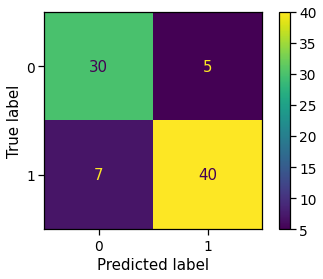

Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.89      0.85      0.87        47

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.86      0.85      0.85        82

ROC Curve
------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


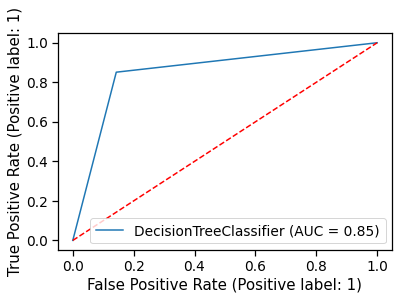

In [40]:
def confusion_matrix(DT, x_test, y_test):
    plot_confusion_matrix(DT, x_test, y_test)
    plt.show()

def roc_curve(DT, x_test, y_test):
    plot_roc_curve(DT, x_test, y_test)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.show()
    
def evaluate(DT, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, y_pred=y_pred):
    print('Confusion Matrix')
    print('------------------------------------------------------')
    confusion_matrix(DT, x_test, y_test)
    
    print('Classification Report') 
    print('------------------------------------------------------')
    print(classification_report(y_test, y_pred))

    print('ROC Curve')
    print('------------------------------------------------------')
    roc_curve(DT, x_test, y_test)
    
evaluate(DT)

In [41]:
print ('Accuracy:{:.2f}'.format(accuracy_score(y_test, y_pred)))
print ('Precision:{:.2f}'.format(precision_score(y_test, y_pred)))
print ('Recall:{:.2f}'.format(recall_score(y_test, y_pred)))
print ('F1_score:{:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy:0.85
Precision:0.89
Recall:0.85
F1_score:0.87


## Random Forest Classifier 

In [42]:
RF = RandomForestClassifier(n_estimators=100)
model_RF = RF.fit(x_train, y_train)
y_predRF = model_RF.predict(X=x_test)

In [43]:
print("Train Score: {}".format(RF.score(x_train, y_train)))
print("Test Score: {}".format(RF.score(x_test, y_test)))

Train Score: 1.0
Test Score: 0.9146341463414634


In [44]:
scores = cross_val_score(RF, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.83076923 0.90769231 0.89230769 0.90769231 0.921875  ]
Average cross-validation score: 0.8920673076923077


Confusion Matrix
------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


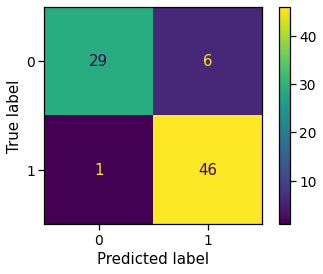

Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.83      0.89        35
           1       0.88      0.98      0.93        47

    accuracy                           0.91        82
   macro avg       0.93      0.90      0.91        82
weighted avg       0.92      0.91      0.91        82

ROC Curve
------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


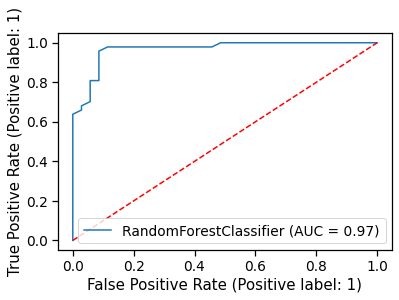

In [45]:
def confusion_matrix(RF, x_test, y_test):
    plot_confusion_matrix(RF, x_test, y_test)
    plt.show()

def roc_curve(RF, x_test, y_test):
    plot_roc_curve(RF, x_test, y_test)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.show()
    
def evaluate(RF, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, y_predRF=y_predRF):
    print('Confusion Matrix')
    print('------------------------------------------------------')
    confusion_matrix(RF, x_test, y_test)
    
    print('Classification Report') 
    print('------------------------------------------------------')
    print(classification_report(y_test, y_predRF))

    print('ROC Curve')
    print('------------------------------------------------------')
    roc_curve(RF, x_test, y_test)
    
evaluate(RF)

In [46]:
print ('Accuracy:{:.2f}'.format(accuracy_score(y_test, y_predRF)))
print ('Precision:{:.2f}'.format(precision_score(y_test, y_predRF)))
print ('Recall:{:.2f}'.format(recall_score(y_test, y_predRF)))
print ('F1_score:{:.2f}'.format(f1_score(y_test, y_predRF)))

Accuracy:0.91
Precision:0.88
Recall:0.98
F1_score:0.93


## XGBoost Classification

In [47]:
XGB = XGBClassifier(max_depth = 1)
model_XGB = XGB.fit(x_train, y_train)
y_pred = model_XGB.predict(x_test)

In [48]:
print("Train Score: {}".format(XGB.score(x_train, y_train)))
print("Test Score: {}".format(XGB.score(x_test, y_test)))

Train Score: 0.9290123456790124
Test Score: 0.8780487804878049


In [49]:
scores = cross_val_score(XGB, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.78461538 0.87692308 0.90769231 0.90769231 0.890625  ]
Average cross-validation score: 0.8735096153846154


Confusion Matrix
------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


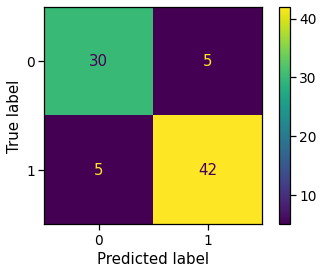

Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.89      0.89      0.89        47

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82

ROC Curve
------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


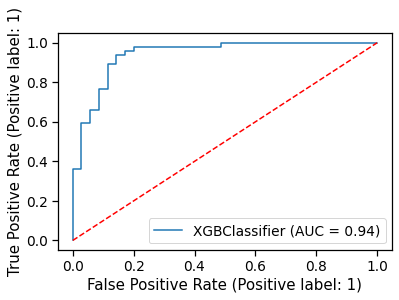

In [50]:
def confusion_matrix(XGB, x_test, y_test):
    plot_confusion_matrix(XGB, x_test, y_test)
    plt.show()

def roc_curve(XGB, x_test, y_test):
    plot_roc_curve(XGB, x_test, y_test)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.show()
    
def evaluate(XGB, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, y_pred=y_pred):
    print('Confusion Matrix')
    print('------------------------------------------------------')
    confusion_matrix(XGB, x_test, y_test)
    
    print('Classification Report') 
    print('------------------------------------------------------')
    print(classification_report(y_test, y_pred))

    print('ROC Curve')
    print('------------------------------------------------------')
    roc_curve(XGB, x_test, y_test)
    
evaluate(XGB)

In [51]:
print ('Accuracy:{:.2f}'.format(accuracy_score(y_test, y_pred)))
print ('Precision:{:.2f}'.format(precision_score(y_test, y_pred)))
print ('Recall:{:.2f}'.format(recall_score(y_test, y_pred)))
print ('F1_score:{:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy:0.88
Precision:0.89
Recall:0.89
F1_score:0.89


## Naive Bayes Classification

In [52]:
NB = GaussianNB()
model_NB = NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)

In [53]:
print("Train Score: {}".format(NB.score(x_train, y_train)))
print("Test Score: {}".format(NB.score(x_test, y_test)))

Train Score: 0.8209876543209876
Test Score: 0.8170731707317073


In [54]:
scores = cross_val_score(NB, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.75384615 0.86153846 0.84615385 0.78461538 0.734375  ]
Average cross-validation score: 0.7961057692307693


Confusion Matrix
------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


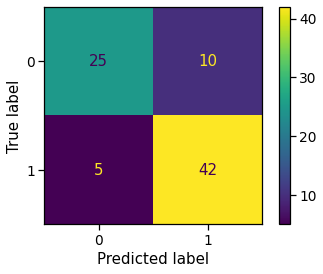

Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        35
           1       0.81      0.89      0.85        47

    accuracy                           0.82        82
   macro avg       0.82      0.80      0.81        82
weighted avg       0.82      0.82      0.81        82

ROC Curve
------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


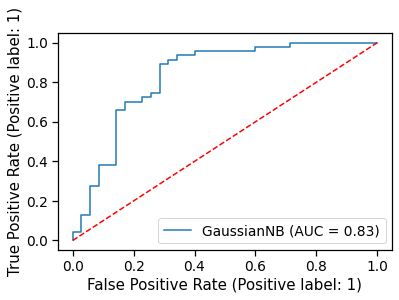

In [55]:
def confusion_matrix(NB, x_test, y_test):
    plot_confusion_matrix(NB, x_test, y_test)
    plt.show()

def roc_curve(NB, x_test, y_test):
    plot_roc_curve(NB, x_test, y_test)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.show()
    
def evaluate(NB, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, y_pred=y_pred):
    print('Confusion Matrix')
    print('------------------------------------------------------')
    confusion_matrix(NB, x_test, y_test)
    
    print('Classification Report') 
    print('------------------------------------------------------')
    print(classification_report(y_test, y_pred))

    print('ROC Curve')
    print('------------------------------------------------------')
    roc_curve(NB, x_test, y_test)
    
evaluate(NB)

In [56]:
print ('Accuracy:{:.2f}'.format(accuracy_score(y_test, y_pred)))
print ('Precision:{:.2f}'.format(precision_score(y_test, y_pred)))
print ('Recall:{:.2f}'.format(recall_score(y_test, y_pred)))
print ('F1_score:{:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy:0.82
Precision:0.81
Recall:0.89
F1_score:0.85


Based on the Machine Learning Model created, the Random Forest Model is the best model, so that model is used

# Model Inference

In [57]:
x_train.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time
253,70.00000,0,88,35,1,236000.00000,1.200000,132,215
315,54.39714,0,448,35,0,306189.14547,1.812057,135,30
75,60.00000,1,47,20,0,204000.00000,0.700000,139,73
64,45.00000,0,582,80,0,263358.03000,1.180000,137,63
55,95.00000,1,371,30,0,461000.00000,2.000000,132,50


In [58]:
x_train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'time'],
      dtype='object')

## Input Value

In [59]:
v1 = [60, 0, 77, 67, 0, 236000, 1.9, 123, 324]
value = [v1]

In [60]:
data = pd.DataFrame(value,  columns= ['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'time'])

data

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time
0,60,0,77,67,0,236000,1.9,123,324


In [61]:
predict = RF.predict(data)
predict

array([0], dtype=int64)

In [62]:
print("Is there any death?")
if predict == 1:
    print("YES")
else :
    print("= NO")

Is there any death?
= NO


# Saving The Best Model

In [63]:
pickle.dump(model_RF, open('model_RF.pkl','wb'))

# Overall

This is the **overall conclusion** of modelling Survival of Patients Prediction with Heart Failure :

1. At the age of 60 years the frequency of death from heart failure has the highest frequency.
2. over 60 years old for diabetics, anemia, and smokers has a higher chances of getting a heart failure.
3. In this dataset, model evaluation was carried out with 4 comparison models, including: Decision Tree, Random Forest, XGBoost, and Naive Bayes method.
4. The Random Forest model gets the highest accuracy for this dataset, at 93% so it is most appropriate for predicting patient safety from heart disease.